In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, select, text

engine = create_engine("sqlite:///data/cv.db", future=True)

#Utility to edit the color of plot

def change_color(color):
    mpl.rcParams['text.color'] = color
    mpl.rcParams['axes.labelcolor'] = color
    mpl.rcParams['axes.edgecolor'] = color
    mpl.rcParams['xtick.color'] = color
    mpl.rcParams['ytick.color'] = color
change_color("#00002B")

In [26]:
#Reads the database
with engine.connect() as conn:
     journals = dict(conn.execute(text("""SELECT strftime('%Y',date), COUNT(id) FROM scientificpublication
                                   WHERE publication_type='journal'
                                   GROUP BY strftime('%Y',date)
                                   """)).all())
     proceedings = dict(conn.execute(text("""SELECT strftime('%Y',date), COUNT(id) FROM scientificpublication
                                   WHERE publication_type='ext-abs'
                                   GROUP BY strftime('%Y',date)
                                   """)).all())
     preprints = dict(conn.execute(text("""SELECT strftime('%Y',date), COUNT(id) FROM scientificpublication
                                   WHERE publication_type='preprint'
                                   GROUP BY strftime('%Y',date)
                                   """)).all())

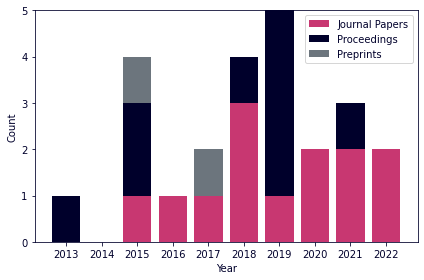

In [39]:
#Count per year
years=list(range(2013,2023))
c_journals=[journals.get(str(year),0) for year in years]
c_preprints=[preprints.get(str(year),0) for year in years]
c_proceedings=[proceedings.get(str(year),0) for year in years]
c_sum=[journals.get(str(year),0)+proceedings.get(str(year),0) for year in years]

#Create the plot
plt.bar(years,c_journals, label='Journal Papers', color="#C83771")
plt.bar(years,c_proceedings, bottom=c_journals, label='Proceedings', color="#00002B")
plt.bar(years,c_preprints, bottom=c_sum, label='Preprints', color="#6c757d")

plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='best',facecolor="white")
plt.tight_layout()
plt.savefig('papers.png'.format(years),dpi=120,transparent=True)
plt.show()